In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
import xgboost as xg

<AxesSubplot:>

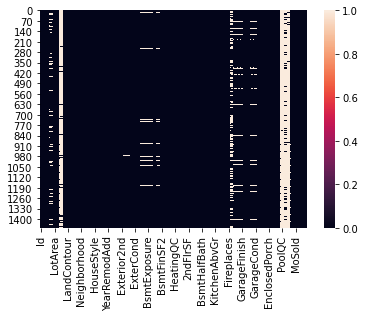

In [2]:
test = pd.read_csv("Kaggle Datasets/House Price Prediction/test.csv")
train= pd.read_csv("Kaggle Datasets/House Price Prediction/train.csv")
y= train.SalePrice
train.drop("SalePrice",axis=1, inplace=True)
sns.heatmap(train.isnull())

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.drop(["Alley","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)
test=test[train.columns.tolist()]

In [5]:
null_obj = train.loc[:,train.dtypes==object].isnull().sum() > 0
for i in range(len(null_obj)):
    if null_obj[i]:
       train[null_obj.index[i]] =train[null_obj.index[i]].fillna(train[null_obj.index[i]].mode()[0])
    
null_obj = test.loc[:,test.dtypes==object].isnull().sum() > 0
for i in range(len(null_obj)):
    if null_obj[i]:
       test[null_obj.index[i]] =test[null_obj.index[i]].fillna(test[null_obj.index[i]].mode()[0])

In [6]:
null_n_obj = train.loc[:,train.dtypes!=object].isnull().sum() > 0
for i in range(len(null_n_obj)):
    if null_n_obj[i]:
        train[null_n_obj.index[i]] = train[null_n_obj.index[i]].fillna(train[null_n_obj.index[i]].mean())

null_n_obj =test.loc[:,test.dtypes!=object].isnull().sum() > 0
for i in range(len(null_n_obj)):
    if null_n_obj[i]:
        test[null_n_obj.index[i]] = test[null_n_obj.index[i]].fillna(test[null_n_obj.index[i]].mean())

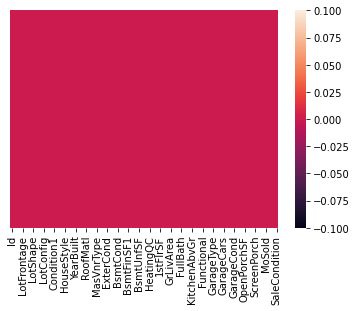

In [7]:
sns.heatmap(train.isnull(), yticklabels=False);

In [8]:
cat_ind_train = train.loc[:,train.dtypes==object]
for i in cat_ind_train:
    dummie = pd.get_dummies(train[i])
    train.drop(i, axis=1, inplace=True)
    train = pd.concat([train, dummie], axis=1)
cat_ind_test = test.loc[:,test.dtypes==object]
for i in cat_ind_test:
    dummie = pd.get_dummies(test[i])
    test.drop(i, axis=1, inplace=True)
    test = pd.concat([test, dummie], axis=1)

In [9]:
final = train.copy()

In [10]:
final.info

<bound method DataFrame.info of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  ConLw  New  Oth  \


In [11]:
final =final.loc[:,~final.columns.duplicated()]
test = test.loc[:,~test.columns.duplicated()]

In [12]:
final.shape

(1460, 204)

In [13]:
Id=test.Id
test.drop("Id", axis=1, inplace=True)
final=final[test.columns.tolist()]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=final
#X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
regressor = xg.XGBRegressor()
params = {
         "n_estimators":[400,700,1000,1300],
          "learning_rate": [0.05, 0.1],
         }
best_model = GridSearchCV(regressor, param_grid=params, cv=5, n_jobs=-1, verbose=5)
best_model.fit(X, y)
#score = mean_squared_log_error(best_model.predict(X_test),y_test)
#score

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
prediction=best_model.predict(test)

In [ ]:
output = pd.DataFrame({'Id': Id,
                       'SalePrice': prediction})
output.to_csv('submission.csv', index=False)